In [19]:
#load important libraries
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
import seaborn as sns
from numpy.linalg import norm

In [2]:
#load the data

#load the users along with their interests
user_interest = pd.read_feather("data/user_interest")

#load the interests along with the word embeddings
interests_alone = pd.read_feather("data/interest_mapping")

#load the interests with occurance count and embeddings
interest_count = pd.read_feather("data/user_interest_embedding")

#load the dataset which contains the user information
user_df = pd.read_feather("data/user_df")

# Create Dataset

In [3]:
user_df.head()

,USER_ID,PROFILE_GENDER,PROFILE_SEARCH_GENDER,PROFILE_AGE,ABOUTME_TEXT,MODE,AgeLabel,tokenized_bio,token_len,avg_embedding,transformer_embeddings
0,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",32,"[-0.012229204177856445, 0.051853179931640625, ...","[0.006370907183736563, 0.047159429639577866, 0..."
1,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",49,"[0.002285704320790816, 0.03512510961415816, 0....","[0.011410237289965153, 0.006558010820299387, 0..."
2,3905778374,F,F,27,London || Psych Grad || 📸 abbaaaaayy || 🇵🇹 || ...,BFF,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -..."
3,2095245846,F,F,34,Americana living in London.,BFF,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01..."
4,2372325814,F,F,32,5’9 Danish girl living in London 🙋🏼‍♀️ Love do...,BFF,25-34,"[5, 9, danish, girl, living, in, london, love,...",13,"[0.04217998798076923, 0.012982881986177884, -0...","[0.055827416479587555, 0.04205679893493652, 0...."


In [4]:
len(user_df)

1479

In [46]:
#find all the user pairs
user_ids = user_df['USER_ID']
user_id_pairs = list(combinations(user_ids, 2))

all_pairs = pd.DataFrame(user_id_pairs, columns=['User_ID_1', 'User_ID_2'])
all_pairs.head()

,User_ID_1,User_ID_2
0,469993479,604719308
1,469993479,3905778374
2,469993479,2095245846
3,469993479,2372325814
4,469993479,1228067214


In [47]:
#include the embeddings as wella s the user's information in this table
all_pairs = all_pairs.merge(user_df, left_on = 'User_ID_1', right_on = 'USER_ID',  how = 'inner')
all_pairs = all_pairs.merge(user_df, left_on = 'User_ID_2', right_on = 'USER_ID',  how = 'inner')

#rename the columns
for col in all_pairs.columns:
    all_pairs.rename(columns={col:col.replace("_x","_1")},inplace=True)
    all_pairs.rename(columns={col:col.replace("_y","_2")},inplace=True)

all_pairs.head()

,User_ID_1,User_ID_2,USER_ID_1,PROFILE_GENDER_1,PROFILE_SEARCH_GENDER_1,PROFILE_AGE_1,ABOUTME_TEXT_1,MODE_1,AgeLabel_1,tokenized_bio_1,...,PROFILE_GENDER_2,PROFILE_SEARCH_GENDER_2,PROFILE_AGE_2,ABOUTME_TEXT_2,MODE_2,AgeLabel_2,tokenized_bio_2,token_len_2,avg_embedding_2,transformer_embeddings_2
0,469993479,604719308,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",49,"[0.002285704320790816, 0.03512510961415816, 0....","[0.011410237289965153, 0.006558010820299387, 0..."
1,469993479,3905778374,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,F,F,27,London || Psych Grad || 📸 abbaaaaayy || 🇵🇹 || ...,BFF,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -..."
2,604719308,3905778374,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,F,F,27,London || Psych Grad || 📸 abbaaaaayy || 🇵🇹 || ...,BFF,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -..."
3,469993479,2095245846,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,F,F,34,Americana living in London.,BFF,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01..."
4,604719308,2095245846,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,F,F,34,Americana living in London.,BFF,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01..."


In [48]:
#convert a list to numpy array
all_pairs['transformer_embeddings_1'] = all_pairs.apply(lambda x: np.array(x.transformer_embeddings_1), axis = 1)
all_pairs['transformer_embeddings_2'] = all_pairs.apply(lambda x: np.array(x.transformer_embeddings_2), axis = 1)

In [49]:
#remove the vectors which have a value of 0
all_pairs['check_1'] = all_pairs.apply(lambda x: (np.zeros(300) == x.avg_embedding_1).all(), axis = 1)
all_pairs['check_2'] = all_pairs.apply(lambda x: (np.zeros(300) == x.avg_embedding_2).all(), axis = 1)

all_pairs = all_pairs[(all_pairs['check_1'] == False) & (all_pairs['check_2'] == False)]

In [62]:
#include gender combination
all_pairs['GENDER_COMBINATION'] = all_pairs['PROFILE_GENDER_1'] + '-' + all_pairs['PROFILE_GENDER_2']

In [68]:
#include age difference
all_pairs['age_difference'] = abs(all_pairs['PROFILE_AGE_1'] - all_pairs['PROFILE_AGE_2'])

In [75]:
# Create a new column based on mode combinations
all_pairs['MODE_COMBINATION'] = all_pairs['MODE_1'] + '-' + all_pairs['MODE_2']

In [63]:
all_pairs.head()

,User_ID_1,User_ID_2,USER_ID_1,PROFILE_GENDER_1,PROFILE_SEARCH_GENDER_1,PROFILE_AGE_1,ABOUTME_TEXT_1,MODE_1,AgeLabel_1,tokenized_bio_1,...,AgeLabel_2,tokenized_bio_2,token_len_2,avg_embedding_2,transformer_embeddings_2,check_1,check_2,cosine_avg_embd,cosine_bert_embd,GENDER_COMBINATION
0,469993479,604719308,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,25-34,"[recently, moved, to, london, looking, for, an...",49,"[0.002285704320790816, 0.03512510961415816, 0....","[0.011410237289965153, 0.006558010820299387, 0...",False,False,0.794705,0.351565,M-F
1,469993479,3905778374,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.380747,0.373376,M-F
2,604719308,3905778374,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.383996,0.451209,F-F
3,469993479,2095245846,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.384341,0.326574,M-F
4,604719308,2095245846,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.479759,0.391401,F-F


# Calculate Similarity

In [51]:
all_pairs['cosine_avg_embd'] = all_pairs.apply(lambda x: calculate_cosine_similarity(x.avg_embedding_1, x.avg_embedding_2),
                                              axis = 1)

In [52]:
all_pairs.head()

,User_ID_1,User_ID_2,USER_ID_1,PROFILE_GENDER_1,PROFILE_SEARCH_GENDER_1,PROFILE_AGE_1,ABOUTME_TEXT_1,MODE_1,AgeLabel_1,tokenized_bio_1,...,ABOUTME_TEXT_2,MODE_2,AgeLabel_2,tokenized_bio_2,token_len_2,avg_embedding_2,transformer_embeddings_2,check_1,check_2,cosine_avg_embd
0,469993479,604719308,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",49,"[0.002285704320790816, 0.03512510961415816, 0....","[0.011410237289965153, 0.006558010820299387, 0...",False,False,0.794705
1,469993479,3905778374,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,London || Psych Grad || 📸 abbaaaaayy || 🇵🇹 || ...,BFF,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.380747
2,604719308,3905778374,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,London || Psych Grad || 📸 abbaaaaayy || 🇵🇹 || ...,BFF,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.383996
3,469993479,2095245846,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,Americana living in London.,BFF,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.384341
4,604719308,2095245846,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,Americana living in London.,BFF,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.479759


In [53]:
all_pairs['cosine_bert_embd'] = all_pairs.apply(lambda x: calculate_cosine_similarity(x.transformer_embeddings_1, x.transformer_embeddings_2),
                                              axis = 1)

In [54]:
all_pairs.head()

,User_ID_1,User_ID_2,USER_ID_1,PROFILE_GENDER_1,PROFILE_SEARCH_GENDER_1,PROFILE_AGE_1,ABOUTME_TEXT_1,MODE_1,AgeLabel_1,tokenized_bio_1,...,MODE_2,AgeLabel_2,tokenized_bio_2,token_len_2,avg_embedding_2,transformer_embeddings_2,check_1,check_2,cosine_avg_embd,cosine_bert_embd
0,469993479,604719308,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,BFF,25-34,"[recently, moved, to, london, looking, for, an...",49,"[0.002285704320790816, 0.03512510961415816, 0....","[0.011410237289965153, 0.006558010820299387, 0...",False,False,0.794705,0.351565
1,469993479,3905778374,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,BFF,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.380747,0.373376
2,604719308,3905778374,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,BFF,25-34,"[london, psych, grad, abbaaaaayy, currently, t...",6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.383996,0.451209
3,469993479,2095245846,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,BFF,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.384341,0.326574
4,604719308,2095245846,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,BFF,25-34,"[americana, living, in, london]",4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.479759,0.391401


# Similarity Sore Analysis

## Overall Distribution

### Word2vec Eembeddings

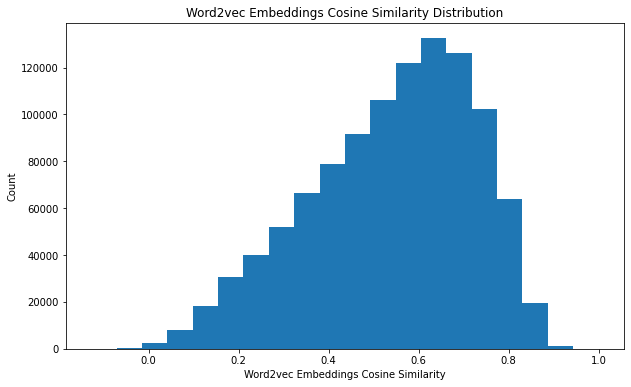

In [56]:
all_pairs['cosine_avg_embd'].plot(kind='hist', bins=20, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('Word2vec Embeddings Cosine Similarity')
plt.ylabel('Count')
plt.title('Word2vec Embeddings Cosine Similarity Distribution')

# Display the plot
plt.show()

### Bert Embeddings

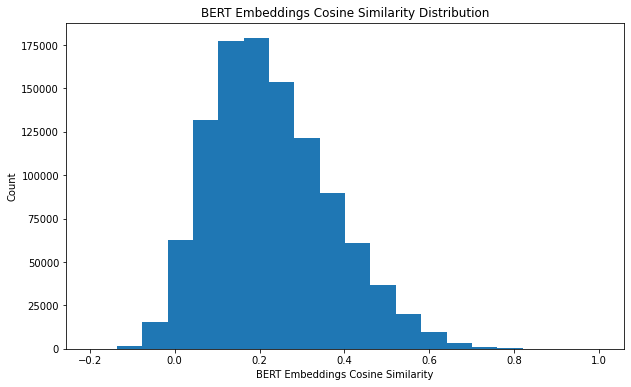

In [57]:
all_pairs['cosine_bert_embd'].plot(kind='hist', bins=20, figsize=(10, 6))

# Add labels and a title to the plot
plt.xlabel('BERT Embeddings Cosine Similarity')
plt.ylabel('Count')
plt.title('BERT Embeddings Cosine Similarity Distribution')

# Display the plot
plt.show()

In [58]:
all_pairs[all_pairs['cosine_bert_embd'] >= 0.8]

,User_ID_1,User_ID_2,USER_ID_1,PROFILE_GENDER_1,PROFILE_SEARCH_GENDER_1,PROFILE_AGE_1,ABOUTME_TEXT_1,MODE_1,AgeLabel_1,tokenized_bio_1,...,MODE_2,AgeLabel_2,tokenized_bio_2,token_len_2,avg_embedding_2,transformer_embeddings_2,check_1,check_2,cosine_avg_embd,cosine_bert_embd
32183,2043013948,682842396,2043013948,F,F,33,"New to London. Enjoy theatre, musicals, art ex...",BFF,25-34,"[new, to, london, enjoy, theatre, musicals, ar...",...,BFF,25-34,"[new, to, london, i, m, fond, of, exploring, n...",19,"[0.011905067845394737, 0.04734400699013158, 0....","[-0.04402543976902962, 0.008637670427560806, -...",False,False,0.723285,0.890750
35605,3057676918,4106386078,3057676918,F,F,27,Looking for a lifetime travel buddy ✨,BFF,25-34,"[looking, for, a, lifetime, travel, buddy]",...,BFF,25-34,"[just, looking, for, a, travel, buddy]",6,"[0.0477142333984375, 0.043553670247395836, 0.0...","[-0.018083302304148674, 0.038576144725084305, ...",False,False,0.899439,0.903814
38460,545473365,3319523893,545473365,F,F,46,"Confident, sophisticated, fun, social, kind.",BFF,45+,"[confident, sophisticated, fun, social, kind]",...,BFF,25-34,"[funny, sophisticated, down, to, earth, some, ...",37,"[0.035877949482685814, 0.037116385794974664, 0...","[0.005783802829682827, -0.018584171310067177, ...",False,False,0.583411,0.833659
71609,2130706990,1545380487,2130706990,F,F,39,6ft3 half 🇬🇧 half 🇫🇷 Kind & always positive. D...,BFF,35-44,"[6ft3, half, half, kind, always, positive, dri...",...,BFF,25-34,"[tall, curious, open, minded, ambitious, with,...",23,"[0.06882642663043478, 0.037565811820652176, -0...","[0.06963173300027847, 0.08185555785894394, 0.0...",False,False,0.748188,0.809342
82083,1831532604,4028760734,1831532604,F,F,38,IG: @annaclaires 🌴,BFF,35-44,"[ig, annaclaires]",...,BFF,18-24,"[ig, danielafamartins]",2,"[-0.0167236328125, 0.125, 0.01611328125, 0.187...","[-0.01552988588809967, 0.089462511241436, -0.0...",False,False,1.000000,0.805016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029329,4140673007,2963417223,4140673007,F,F,25,New to London and hoping to make new friends!!,BFF,25-34,"[new, to, london, and, hoping, to, make, new, ...",...,BOTH,25-34,"[hi, i, am, new, to, london, looking, for, new...",10,"[-0.071624755859375, 0.0393310546875, 0.041027...","[0.002965081948786974, -0.005752416793256998, ...",False,False,0.762413,0.875092
1029722,267405774,2963417223,267405774,M,F,32,New to London getting to know people here,DATING,25-34,"[new, to, london, getting, to, know, people, h...",...,BOTH,25-34,"[hi, i, am, new, to, london, looking, for, new...",10,"[-0.071624755859375, 0.0393310546875, 0.041027...","[0.002965081948786974, -0.005752416793256998, ...",False,False,0.793105,0.849606
1081987,1153594325,538524038,1153594325,F,M,29,"Canadian, living in London.",DATING,25-34,"[canadian, living, in, london]",...,BOTH,25-34,"[a, canadian, living, in, london]",5,"[-0.136328125, 0.0155517578125, -0.035546875, ...","[-0.0375848188996315, 0.040777649730443954, 0....",False,False,1.000000,0.868019
1082578,2216214980,538524038,2216214980,F,M,26,Canadian living in London 📍,BOTH,25-34,"[canadian, living, in, london]",...,BOTH,25-34,"[a, canadian, living, in, london]",5,"[-0.136328125, 0.0155517578125, -0.035546875, ...","[-0.0375848188996315, 0.040777649730443954, 0....",False,False,1.000000,0.934597


In [59]:
all_pairs['ABOUTME_TEXT_1'][32183]

'New to London. Enjoy theatre, musicals, art exhibitions, photography, dancing, having brunch and exploring London on sunny weekends. Hopefully, you do too :)'

In [60]:
all_pairs['ABOUTME_TEXT_2'][32183]

'New to London. I’m fond of exploring new cities, architecture, reading, museums, engaging conversations, yoga, hiking, and design.'

## Gender Based Distribution

### Word2vec

In [78]:
all_pairs.head()

,User_ID_1,User_ID_2,USER_ID_1,PROFILE_GENDER_1,PROFILE_SEARCH_GENDER_1,PROFILE_AGE_1,ABOUTME_TEXT_1,MODE_1,AgeLabel_1,tokenized_bio_1,...,avg_embedding_2,transformer_embeddings_2,check_1,check_2,cosine_avg_embd,cosine_bert_embd,GENDER_COMBINATION,age_difference,age_difference_bin,MODE_COMBINATION
0,469993479,604719308,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,"[0.002285704320790816, 0.03512510961415816, 0....","[0.011410237289965153, 0.006558010820299387, 0...",False,False,0.794705,0.351565,M-F,2,"(0, 10]",BFF-BFF
1,469993479,3905778374,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.380747,0.373376,M-F,1,"(0, 10]",BFF-BFF
2,604719308,3905778374,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.383996,0.451209,F-F,1,"(0, 10]",BFF-BFF
3,469993479,2095245846,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.384341,0.326574,M-F,6,"(0, 10]",BFF-BFF
4,604719308,2095245846,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.479759,0.391401,F-F,8,"(0, 10]",BFF-BFF


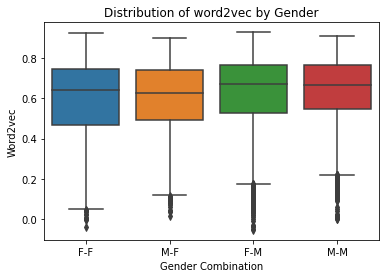

In [84]:
sns.boxplot(x='GENDER_COMBINATION', y='cosine_avg_embd', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('Word2vec')
plt.title('Distribution of word2vec by Gender')

# Display the plot
plt.show()

### BERT

In [89]:
sub = all_pairs[(all_pairs['PROFILE_AGE_1'] >= 40) & (all_pairs['PROFILE_AGE_2'] >= 40)]

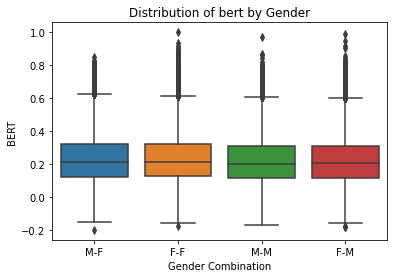

In [91]:
sns.boxplot(x='GENDER_COMBINATION', y='cosine_bert_embd', data=all_pairs)

# Set labels and title
plt.xlabel('Gender Combination')
plt.ylabel('BERT')
plt.title('Distribution of bert by Gender')

# Display the plot
plt.show()

## Age Based Distribution

### Word2vec

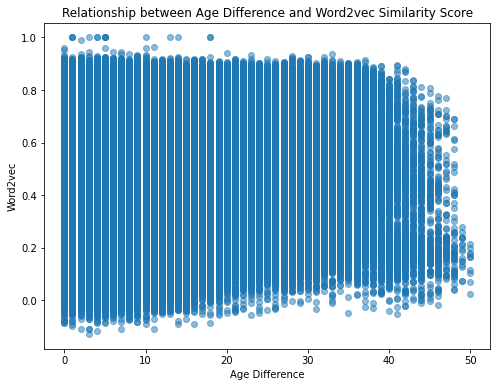

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['cosine_avg_embd'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('Word2vec')
plt.title('Relationship between Age Difference and Word2vec Similarity Score')
plt.show()

In [70]:
bin_edges = [0, 10, 20, 30, 40, 55, 100]

# Create a new column 'age_difference_bin' containing the age difference bins
all_pairs['age_difference_bin'] = pd.cut(all_pairs['age_difference'], bins=bin_edges)

all_pairs.head()

,User_ID_1,User_ID_2,USER_ID_1,PROFILE_GENDER_1,PROFILE_SEARCH_GENDER_1,PROFILE_AGE_1,ABOUTME_TEXT_1,MODE_1,AgeLabel_1,tokenized_bio_1,...,token_len_2,avg_embedding_2,transformer_embeddings_2,check_1,check_2,cosine_avg_embd,cosine_bert_embd,GENDER_COMBINATION,age_difference,age_difference_bin
0,469993479,604719308,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,49,"[0.002285704320790816, 0.03512510961415816, 0....","[0.011410237289965153, 0.006558010820299387, 0...",False,False,0.794705,0.351565,M-F,2,"(0, 10]"
1,469993479,3905778374,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.380747,0.373376,M-F,1,"(0, 10]"
2,604719308,3905778374,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,6,"[-0.10618082682291667, 0.042744954427083336, -...","[-0.013180532492697239, 0.03797052800655365, -...",False,False,0.383996,0.451209,F-F,1,"(0, 10]"
3,469993479,2095245846,469993479,M,M,28,"Career driven, and family orientated. I enjoy ...",BFF,25-34,"[career, driven, and, family, orientated, i, e...",...,4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.384341,0.326574,M-F,6,"(0, 10]"
4,604719308,2095245846,604719308,F,F,26,"Recently moved to London, looking for an excel...",BFF,25-34,"[recently, moved, to, london, looking, for, an...",...,4,"[-0.07305908203125, 0.121734619140625, -0.0755...","[-0.01882741041481495, 0.057008046656847, 0.01...",False,False,0.479759,0.391401,F-F,8,"(0, 10]"


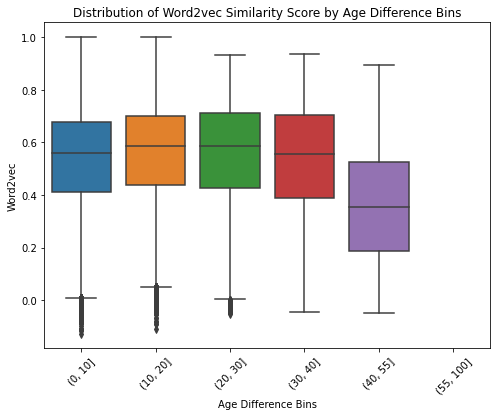

In [71]:
filtered_df = all_pairs[all_pairs['cosine_avg_embd'] != 0]


plt.figure(figsize=(8, 6))
sns.boxplot(data=all_pairs, x='age_difference_bin', y='cosine_avg_embd')
plt.xlabel('Age Difference Bins')
plt.ylabel('Word2vec')
plt.title('Distribution of Word2vec Similarity Score by Age Difference Bins')
plt.xticks(rotation=45)
plt.show()

### BERT

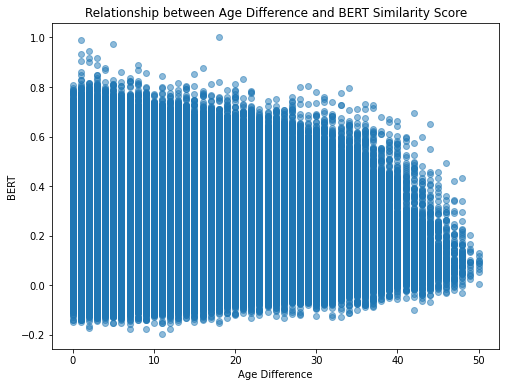

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(all_pairs['age_difference'], all_pairs['cosine_bert_embd'], alpha = 0.5)
plt.xlabel('Age Difference')
plt.ylabel('BERT')
plt.title('Relationship between Age Difference and BERT Similarity Score')
plt.show()

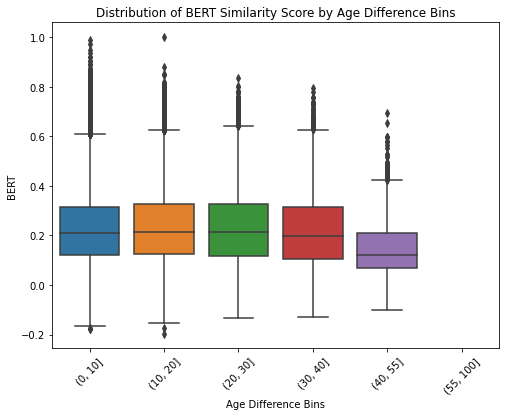

In [74]:
filtered_df = all_pairs[all_pairs['cosine_bert_embd'] != 0]


plt.figure(figsize=(8, 6))
sns.boxplot(data=all_pairs, x='age_difference_bin', y='cosine_bert_embd')
plt.xlabel('Age Difference Bins')
plt.ylabel('BERT')
plt.title('Distribution of BERT Similarity Score by Age Difference Bins')
plt.xticks(rotation=45)
plt.show()

## Mode Based Distribution

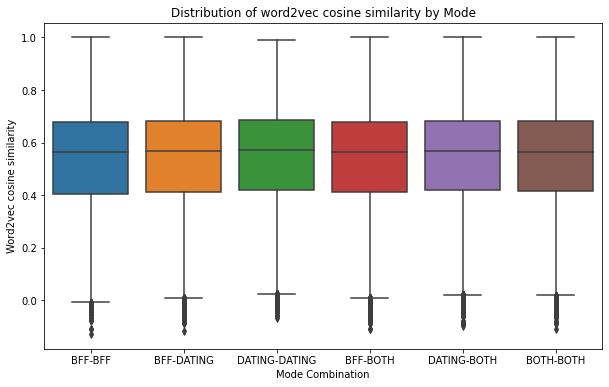

In [76]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='cosine_avg_embd', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('Word2vec cosine similarity')
plt.title('Distribution of word2vec cosine similarity by Mode')

# Display the plot
plt.show()

### BERT

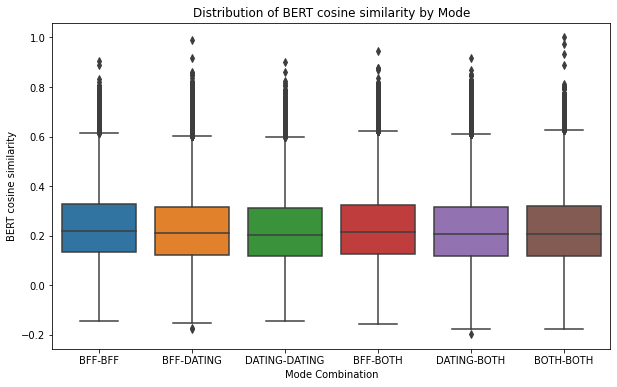

In [98]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='MODE_COMBINATION', y='cosine_bert_embd', data=all_pairs)

# Set labels and title
plt.xlabel('Mode Combination')
plt.ylabel('BERT cosine similarity')
plt.title('Distribution of BERT cosine similarity by Mode')

# Display the plot
plt.show()

# Functions

In [34]:
def calculate_cosine_similarity(A, B):
    '''
    A function that calculates the cosine similarity between 2 vectors
    
    Inputs: A - vector of shape (x,) (type: numpy array)
            B - vetor of shape (x,) (type: numpy array)
    
    Output: cosine_sim - the cosine similarity score between the 2 vectors (type: int)
    
    '''
     

    cosine_sim = np.dot(A,B)/(norm(A)*norm(B))
    
    return cosine_sim
    